## Importing the Trained Models and the libraries

In [1]:
#Importing all major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import joblib
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#Importing Temperature Prediction Model,
import warnings
warnings.filterwarnings('ignore')


TEMP = joblib.load('Trained Models/TRandomForest.pkl')

In [3]:
#Importing Precipitation Prediction Model

PREC = joblib.load(r'Trained Models/PLogisticRegression.pkl')
PPP = joblib.load(r'Trained Models/PRandomForest.pkl')

In [5]:
#Importing Humidity Predcition Model
HUM = joblib.load(r'Trained Models/HRandomForest.pkl')
HUM_Poly = joblib.load(r'Trained Models/HPolynomialRegression.pkl')
poly=PolynomialFeatures(degree=4, include_bias=False)

## Serializing Data through Arduino (not be runned if not connected to Arduino and the sensors)

In [32]:
#%run C:\Users\Mayank\Weather Prediction AI Project\Machine Learning Models\Arduino Control.ipynb

In [47]:
#Code to be runned with Arduino in connection

import serial
import time

# set up the serial line
ser = serial.Serial('COM4', 9600)
time.sleep(2)

# Read and record the data
data =[]                       # empty list to store the data
for i in range(1):
    b = ser.readline()         # read a byte string
    string_n = b.decode()  # decode byte string into Unicode  
    string = string_n.rstrip() # remove \n and \r       # convert string to float
    print(string)
    data.append(string)           # add to the end of data list
    time.sleep(0.1)            # wait (sleep) 0.1 seconds

ser.close()

l=[]

for line in data:
    l.append(data)
    print(line)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(data)
plt.xlabel('Time (seconds)')
plt.ylabel('Potentiometer Reading')
plt.title('Potentiometer Reading vs. Time')
plt.show()

30

In [ ]:
#Code to split and use the data for predictions

s=l[0]
print(s)
l=s[0].split()
h=float(l[1])
t=int(l[3])

## Taking the input manually (use it, if not connected to Arduino and required sensors)

In [6]:
#Taking all the initial variables with their values some value are taken as input which are automatically taken upon integration with Hardware

t=int(input("Enter the temperature in Celsuius:"))
h=int(input("Enter the relative humidity: "))
p=int(input("Tell whether it is raining presently or not, 0 for no and 1 for yes: "))

t6=int(input("Enter the temperature in Celsuius, 6 hours ago:"))
h6=int(input("Enter the relative humidity, 6 hours ago:: "))
p6=int(input("Tell whether it is raining presently or not, 0 for no and 1 for yes, 6 hours ago:: "))

Enter the temperature in Celsuius:30
Enter the relative humidity: 67
Tell whether it is raining presently or not, 0 for no and 1 for yes: 0
Enter the temperature in Celsuius, 6 hours ago:32
Enter the relative humidity, 6 hours ago:: 70
Tell whether it is raining presently or not, 0 for no and 1 for yes, 6 hours ago:: 0


### Function to calculate Dew Point

In [7]:
#Dew Point

def ln(n):
    return np.log(n)

def Tdew(T,H):
    nl =ln(H/100)
    s=237.3+T
    m=17.27*T
    TD = (237.3*(nl+(m/s)))/(17.27+(-1)*(nl+(m/s)))    
    return TD

### Function to calculate Heat Index

In [8]:
#Heat Index

def HI(t,H):
    c1 = -42.379
    c2= 2.04901523
    c3 = 10.14333127
    c4 = -0.22475541
    c5 = -6.83783 *(0.001)
    c6 = -5.481717 * (0.01)
    c7 = 1.22874 * (0.001)
    c8 = 8.5282 * (0.0001)
    c9 = -1.99 * (0.000001)
    T=(1.8*t)+32
    HI=c1+(c2*T)+(c3*H)+(c4*T*H)+(c5*T*T)+(c6*H*H)+(c7*T*H*T)+(c8*T*H*H)+(c9*T*H*T*H)
    FHI=((HI-32)*5)/9
    return FHI

## Initializing required variables and the list to store the data

In [9]:
#For hourly, daily, weekly and min max temp details
L=[]

from datetime import datetime
datetime.today()
date=datetime.now()

da=date.day
hr=date.hour
mn=date.month

In [10]:
#RH,P,T are for current data
#RH is relative humidity, P is precipitation, T is temperature, 
RH=h
P=p
T=t
print(RH,P,T)

#List for data  (d stands for day)
dd=[] #dew point
hid=[] #heat index
td=[]
hd=[]
pd_=[]


#Variables and list for data  (r stands for representation i.e. plotting the data)
DR=[]
HIR=[]
TR=[]
HR=[]
PR=[]

#Calculating Maximum and minimum temperatures
MxT=[]
MnT=[]

67 0 30


## Predicting the temperature 10 days in advance at an interval of 6 hours

In [11]:
for d in range(0,11):
    for h in range(0,5):
        
        #TP,PP,HP are for 1 hour in future data
        
        dewpoint=Tdew(T,RH)
        #print("Dew Point at",hr,da,mn,"is equal to",dewpoint)
                
        heatindex=HI(T,RH)
        #print("Heat Index at",hr,da,mn,"is equal to",heatindex)
        
        t_=np.array([da,mn,hr,heatindex,RH,P,t6]).reshape(1,-1)
        TP=list(TEMP.predict(t_))[0]
        #print("Temperature predicted at",hr,da,mn,"is equal to",TP)
        
        p_=np.array([da,mn,hr,dewpoint,RH,1,p6]).reshape(1,-1)
        PP=list(PREC.predict(p_))[0]
        #print("Precipitation predicted at",hr,da,mn,"is equal to",PP)
        
        h_=np.array([da,mn,hr,dewpoint,heatindex,T,P,h6]).reshape(1, -1)
        HP=list(HUM.predict(h_))[0]
        #x=poly.fit_transform(h_)
        #HP=HUM_Poly.predict(x)
        #print("Humidity predicted at",hr,da,mn,"is equal to",HP)
        
        #print("")
        
        #Adding prediction for a day list to take the mean
        dd.append(dewpoint)
        hid.append(heatindex)
        td.append(TP)
        hd.append(HP)
        pd_.append(PP)
        
        
        #Upddating THE previous variables
        t6=T
        h6=RH
        p6=P
                
        T=TP
        RH=HP
        P=PP
                
        #Updating Date and Time is final
        hr+=6
        if hr>=24:
            hr=0
            h=24
            da+=1
        if da==31:
            mn+=1
            da=1
    
    #Calculating mean of all the variables for a day
    DR.append(np.mean(dd))
    HIR.append(np.mean(hid))
    TR.append(np.mean(td))
    HR.append(np.mean(hd))
    PR.append(np.mean(pd_))
    
    #Calculating Maximum and Minimum Temperature
    MxT.append(max(td))
    MnT.append(min(td))
    
    dd.clear()
    hid.clear()
    td.clear()
    hd.clear()
    pd_.clear()
    

## Representing the data

In [12]:
DR=np.array(DR)
HIR=np.array(HIR)
TR=np.array(TR)
HR=np.array(HR)
PR=np.array(PR)
MxT=np.array(MxT)
MnT=np.array(MnT)

In [13]:
da=date.day
mn=date.month
yr=date.year

if da==31:
    mn+=1
    da=1

''''def Gen():
    for i in range(1,15):
        yield i
x=Gen() '''

for i in range(10):
    print("Date"," ",da,"-",mn,"-",yr,sep='')
    print("")
    print("Maximum Temperature is:",MxT[i])
    print("Minimum Temperature is:",MnT[i])
    if PR[i]>0:
        print("It will rain probability is",PR[i]*100,'%')
    else:
        print("It will not rain")
    print("Dew point is:",DR[i])
    print("Heat Index is:",HIR[i])
    print("Humidity is:",HR[i],'%')
    
    print()
    print()
    
    i+=1
    da+=1
    
    
    if da==31:
        mn = mn+1
        da=1
    

Date 20-3-2023

Maximum Temperature is: 23.89
Minimum Temperature is: 17.63
It will not rain
Dew point is: 15.963632751378332
Heat Index is: 26.759215570224267
Humidity is: 63.70400000000001 %


Date 21-3-2023

Maximum Temperature is: 24.43
Minimum Temperature is: 19.5
It will not rain
Dew point is: 15.320504241626688
Heat Index is: 24.832745454431695
Humidity is: 61.2275 %


Date 22-3-2023

Maximum Temperature is: 24.86
Minimum Temperature is: 20.6
It will not rain
Dew point is: 14.14593678925365
Heat Index is: 24.86524456964011
Humidity is: 59.6032 %


Date 23-3-2023

Maximum Temperature is: 25.97
Minimum Temperature is: 20.66
It will not rain
Dew point is: 15.355905991845827
Heat Index is: 25.40805552137866
Humidity is: 63.724000000000004 %


Date 24-3-2023

Maximum Temperature is: 25.93
Minimum Temperature is: 21.16
It will not rain
Dew point is: 15.441275916540912
Heat Index is: 25.693541999488332
Humidity is: 56.75866666666667 %


Date 25-3-2023

Maximum Temperature is: 26.45
Min

Dew Point


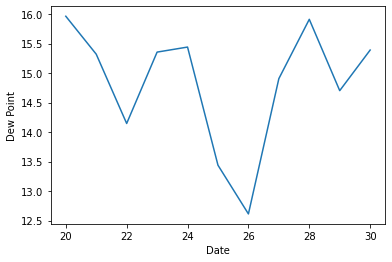

Heat Index


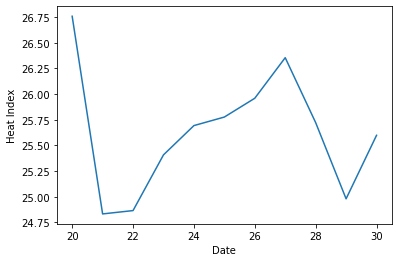

Temperature


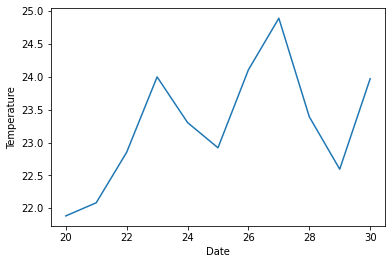

Precipitation chances


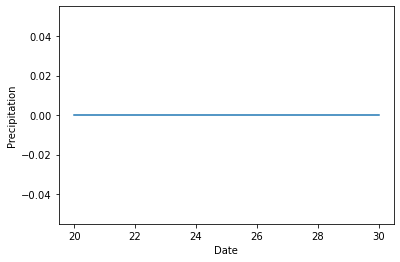

Humidity


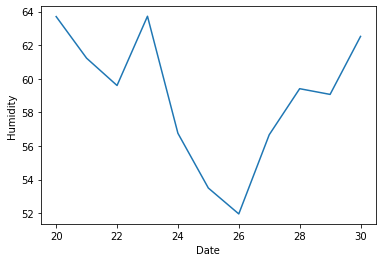

In [14]:
da=date.day
Day=np.arange(da,da+11)

#Plotting Dew Point
print("Dew Point")
plt.xlabel("Date")
plt.ylabel("Dew Point")
plt.plot(Day,DR)
plt.show()

#Plotting Heat Index
print("Heat Index")
plt.xlabel("Date")
plt.ylabel("Heat Index")
plt.plot(Day,HIR)
plt.show()

#Plotting Temperature
print("Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.plot(Day,TR)
plt.show()

#Plotting Precipitation
print("Precipitation chances")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.plot(Day,PR*100)
plt.show()

#Plotting Humidity
print("Humidity")
plt.xlabel("Date")
plt.ylabel("Humidity")
plt.plot(Day,HR)
plt.show()